# Honour Code
I Victor, Nkadimeng, confirm - by submitting my - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

#### Import Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [32]:
train = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')

In [33]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [34]:
test_1 = test[['TransactionId']]

### Checking if the class in balanced

In [35]:
train['FraudResult'].value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

### Visualize the class

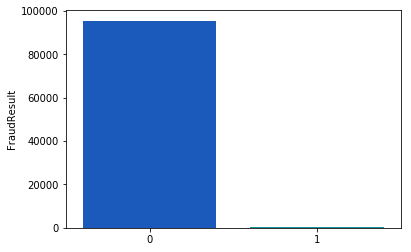

In [36]:
sns.barplot(train['FraudResult'].value_counts().index,train['FraudResult'].value_counts(),palette='winter')

### Resample the data

In [37]:
# from sklearn.utils import resample
# # Majority Variable
# train_maj = train[train['FraudResult'] == 0]
# # Minority variable 
# train_min = train[train['FraudResult'] == 1]

# train_maj_sampled = resample(train_maj , replace = False, n_samples = len(train_min), random_state = 123)

# train_concat = pd.concat([train_maj_sampled,train_min])

In [38]:
# train = train_concat

In [39]:
# sns.barplot(train_concat['FraudResult'].value_counts().index,train_concat['FraudResult'].value_counts(),palette='winter')

#### Checking Missing Values

In [40]:
train_missing_values = train.isnull().sum() / len(train) * 100
train_missing_values  = round(train_missing_values[train_missing_values > 0],2)
train_missing_values.sort_values(ascending = False, inplace = True)
pd.DataFrame(train_missing_values,columns = ['Missing'])

,Missing


No missing values

#### Data Encoding (LabelEncoder)

In [41]:
from sklearn.preprocessing import LabelEncoder
# Train columns
cat = train.select_dtypes(include = object)
cat_col = list(cat)

# Test columns
num = test.select_dtypes(include = object)
num_col = list(num)

# Train Label Encooding
for col in cat_col:
    label = LabelEncoder()
    label.fit(list(train[col].values))
    train[col] = label.transform(list(train[col].values))

# Test Label Encoding
for col in num_col:
    label = LabelEncoder()
    label.fit(list(test[col].values))
    test[col] = label.transform(list(test[col].values))  


In [42]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,27503,21131,784,1941,1143,0,256,4,19,0,2,1000.0,1000,0,4
1,43295,24825,1346,932,1756,0,256,4,5,2,2,2000.0,2000,1,2
2,26351,35635,2179,1611,1143,0,256,3,22,2,1,-50.0,50,2,2
3,19533,3718,924,2055,1306,0,256,4,1,0,2,3000.0,3000,3,4
4,17346,19131,2179,1611,1306,0,256,3,22,2,1,-60.0,60,4,2


In [43]:
# Separating a target variable
y = train['FraudResult']

# Predictors
X = train.drop(columns='FraudResult')

#### Split data

In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


#### Fit the model

In [45]:
# Instatiating objects
lg = LogisticRegression()
rf = RandomForestClassifier()

# Fitting the data
lg.fit(X_train,y_train)
rf.fit(X_train,y_train)
y_pred_lg = lg.predict(X_test)
y_pred_rf = rf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


####  Evaluating Model Performance

In [46]:
print('Logist :',accuracy_score(y_test,y_pred_lg))
print('Ramdom :',accuracy_score(y_test,y_pred_rf))

print('Rou : ', roc_auc_score(y_test,y_pred_lg))
print('Rou : ', roc_auc_score(y_test,y_pred_rf))

print('.......................CLASSIFICATION REPORT.....................')

print('Logistic Classifiction Report:', classification_report(y_test,y_pred_lg))
print('Random Forest Report:', classification_report(y_test,y_pred_rf))

Logist : 0.9983797627136362
Ramdom : 0.9995296085297654
Rou :  0.6427000583456756
Rou :  0.9427262390975868
.......................CLASSIFICATION REPORT.....................
Logistic Classifiction Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19098
           1       0.62      0.29      0.39        35

   micro avg       1.00      1.00      1.00     19133
   macro avg       0.81      0.64      0.70     19133
weighted avg       1.00      1.00      1.00     19133

Random Forest Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19098
           1       0.86      0.89      0.87        35

   micro avg       1.00      1.00      1.00     19133
   macro avg       0.93      0.94      0.94     19133
weighted avg       1.00      1.00      1.00     19133



In [47]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,27503,21131,784,1941,1143,0,256,4,19,0,2,1000.0,1000,0,4
1,43295,24825,1346,932,1756,0,256,4,5,2,2,2000.0,2000,1,2
2,26351,35635,2179,1611,1143,0,256,3,22,2,1,-50.0,50,2,2
3,19533,3718,924,2055,1306,0,256,4,1,0,2,3000.0,3000,3,4
4,17346,19131,2179,1611,1306,0,256,3,22,2,1,-60.0,60,4,2


#### Creating a Data Frame

In [48]:
df  = pd.DataFrame({'TransactionId': test_1['TransactionId'], 'FraudResult': rf.predict(test)})

#### Creating a csv

In [49]:
df.to_csv('out_csv.csv',index = False)